Treinaremos com 7500 elementos e testaremos com 2500 elementos 
A acurácia foi de : 76.84% 


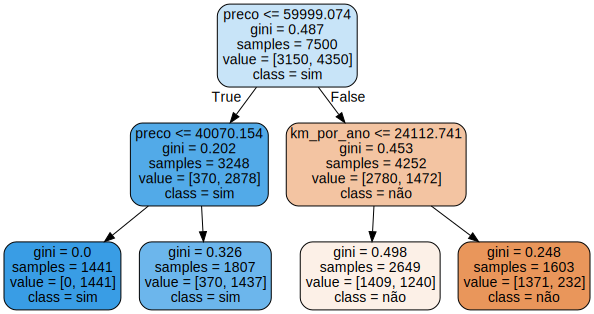

In [8]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import graphviz
dados = pd.read_csv("https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv")

a_renomear = {"mileage_per_year":"milhas_por_ano", "model_year":"ano_do_modelo", "price":"preco", "sold":"vendido"}

dados.rename(columns=a_renomear, inplace=True)
troca = {"yes":1, "no":0}

dados["vendido"] = dados.vendido.map(troca)


from datetime import datetime

year = datetime.today().year

dados["idade_do_modelo"] = year - dados.ano_do_modelo
dados["km_por_ano"] = dados.milhas_por_ano * 1.60934

dados.drop(columns=["milhas_por_ano", "Unnamed: 0", "ano_do_modelo"], axis=1, inplace=True)
dados.head()

x = dados[["preco", "idade_do_modelo", "km_por_ano"]]
y = dados["vendido"]

np.random.seed(5)

treino_x, teste_x, treino_y, teste_y = train_test_split(x,y, test_size=0.25, stratify=y)

scaler = StandardScaler()
scaler.fit(raw_treino_x)

# treino_x = scaler.transform(raw_treino_x)
# teste_x = scaler.transform(raw_teste_x)

print("Treinaremos com %d elementos e testaremos com %d elementos " % (len(treino_x), len(teste_x)))

modelo1 = DecisionTreeClassifier(max_depth=2)
modelo1.fit(treino_x, treino_y)

previsoes = modelo1.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes)*100
print("A acurácia foi de : %.2f%% " % acuracia )

features = x.columns

dot_data = export_graphviz(modelo1, feature_names=features, filled=True, rounded=True, class_names=["não", "sim"])
grafico = graphviz.Source(dot_data)

grafico